## Observations and Insights

1. Mouse weight and tumor volume are very highly positively correlated (0.84 correlation coefficient)
2. Of the top four regimens, only one had an outlier, which means the regimens produced consistent results.
3. Capomulin and Ramicane had the most data points, so we can infer that they had the highest rates of survival.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Summary statistics table of mean, median, variance, std dev, and SEM of the tumor volume for each regimen

# Perform aggregation functions on dataframe grouped by regimen
aggs = {'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}
summary_df = merged_df.groupby('Drug Regimen').agg(aggs)

# Rename columns and format all values
summary_df = summary_df.rename(columns={'mean':'Mean', 'median':'Median', 'var':'Variance',
                                        'std':'Standard Deviation', 'sem':'Standard Error'})
summary_df = summary_df.applymap('{:.2f}'.format).astype(float)
summary_df

Tumor Volume (mm3)                                     \
                           Mean Median Variance Standard Deviation   
Drug Regimen                                                         
Capomulin                 40.68  41.56    24.95               4.99   
Ceftamin                  52.59  51.78    39.29               6.27   
Infubinol                 52.88  51.82    43.13               6.57   
Ketapril                  55.24  53.70    68.55               8.28   
Naftisol                  54.33  52.51    66.17               8.13   
Placebo                   54.03  52.29    61.17               7.82   
Propriva                  52.32  50.85    42.35               6.51   
Ramicane                  40.22  40.67    23.49               4.85   
Stelasyn                  54.23  52.43    59.45               7.71   
Zoniferol                 53.24  51.82    48.53               6.97   

                             
             Standard Error  
Drug Regimen                 
Capomulin              0.33  
Ceftamin               0.47  
Infubinol              0.49  
Ketapril               0.60  
Naftisol               0.60  
Placebo                0.58  
Propriva               0.51  
Ramicane               0.32  
Stelasyn               0.57  
Zoniferol              0.52

## Bar plots

(-0.5, 9.5)

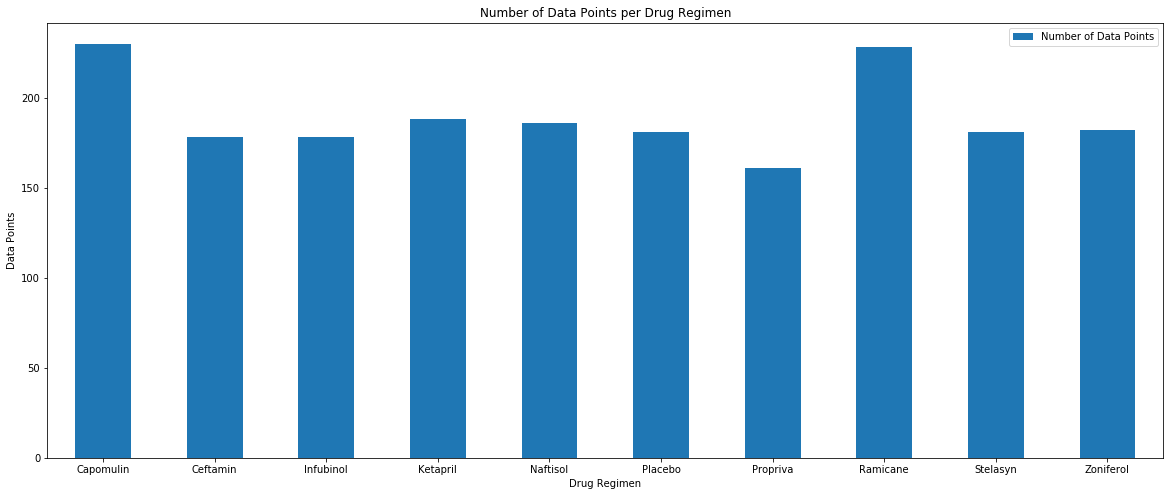

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Group by regimen and count number of data points
grouped_df = merged_df.groupby('Drug Regimen')
counts_df = pd.DataFrame(grouped_df['Mouse ID'].count())

# Plot dataframe using pandas and apply formatting
ax = counts_df.plot(kind='bar', figsize=(20, 8), rot=0)
ax.legend(['Number of Data Points'])
ax.set_title('Number of Data Points per Drug Regimen')
ax.set_ylabel('Data Points')
ax.set_xlim(left=-0.5)

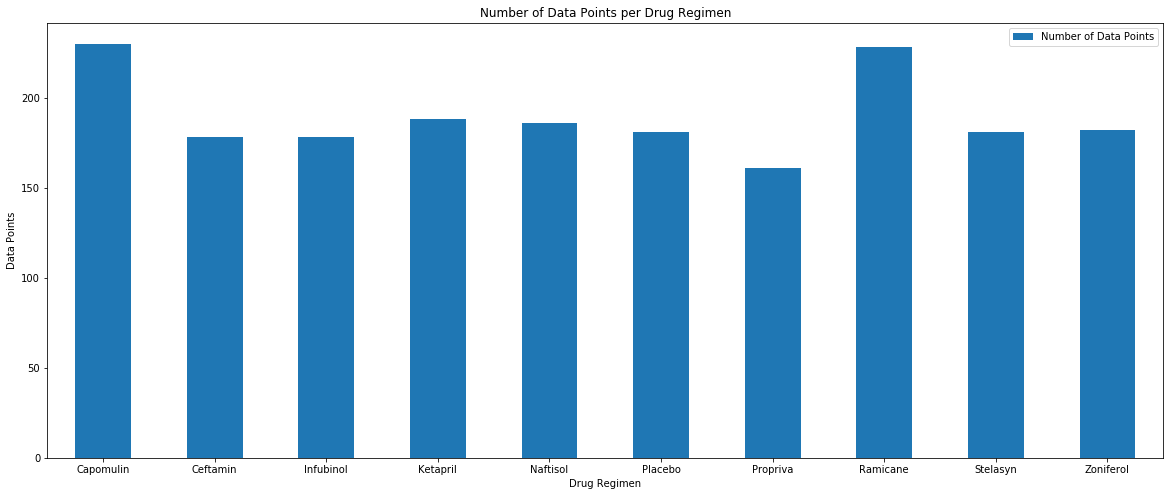

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Group by regimen and count number of data points
grouped_df = merged_df.groupby('Drug Regimen')
counts_df = pd.DataFrame(grouped_df['Mouse ID'].count())

# Plot using matplotlib.pyplot
plt.figure(figsize=(20,8))
plt.bar(counts_df.index, counts_df['Mouse ID'], width=0.5)
plt.legend(['Number of Data Points'])
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.xlim(-0.5, 9.5)
plt.title('Number of Data Points per Drug Regimen')
plt.show()

## Pie plots

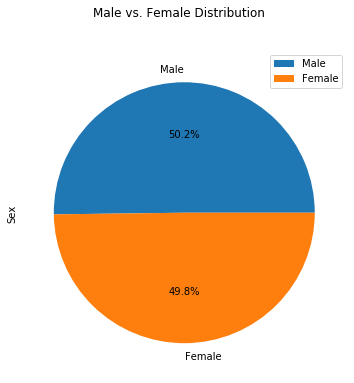

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create dataframe of unique Mouse IDs
unique_df = merged_df.drop_duplicates(subset='Mouse ID')

# Plot value counts of 'Sex' using DataFrame.plot
counts = pd.DataFrame(unique_df['Sex'].value_counts())
ax = counts.plot(kind='pie', subplots = True, autopct='%1.1f%%', figsize=(6, 6), title='Male vs. Female Distribution')

Text(0.5, 1.0, 'Male vs. Female Distribution')

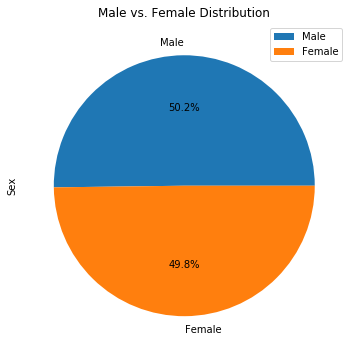

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create dataframe of unique Mouse IDs
unique_df = merged_df.drop_duplicates(subset='Mouse ID')

# Plot value counts of 'Sex' using matplotlib.pyplot
counts = unique_df['Sex'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(counts, labels = ['Male', 'Female'], autopct='%1.1f%%')
ax.legend(['Male', 'Female'])
ax.set_ylabel('Sex')
ax.set_title('Male vs. Female Distribution')

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Define top four regimens
top4 = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

# Set index to regimen to be able to .loc top four
merged_df2 = merged_df.set_index('Drug Regimen')

# Create top four dataframe
top4_df = merged_df2.loc[top4, :]

# Group top four dataframe by Mouse ID, mark position of each mouse's final timepoint using Boolean values
grouped_top4_df = top4_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == top4_df['Timepoint']

# Create dataframe of all final timepoints by indexing the top four dataframe using the above Boolean series
final_vol_df = top4_df[grouped_top4_df]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Get quartiles of final tumor volumes for each regimen
quartiles = final_vol_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
quartiles_df = pd.DataFrame(quartiles)

# Loop through regimens, calculate IQR and lower/upper bounds, report values for potential outliers and # of outliers
for regimen in top4:
    lowerq = quartiles_df.loc[(regimen, 0.25), 'Tumor Volume (mm3)']
    upperq = quartiles_df.loc[(regimen, 0.75), 'Tumor Volume (mm3)']
    iqr = round(upperq - lowerq, 2)    
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    print(f'The IQR for {regimen} is {iqr}')
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    regimen_df = final_vol_df.loc[regimen]
    outliers = regimen_df.loc[(regimen_df['Tumor Volume (mm3)'] > upper_bound) | 
                              (regimen_df['Tumor Volume (mm3)'] < lower_bound)]
    print(f'Number of outliers: {len(outliers)}\n')

The IQR for Ramicane is 9.1
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Number of outliers: 0

The IQR for Capomulin is 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Number of outliers: 0

The IQR for Ceftamin is 15.58
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
Number of outliers: 0

The IQR for Infubinol is 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Number of outliers: 1



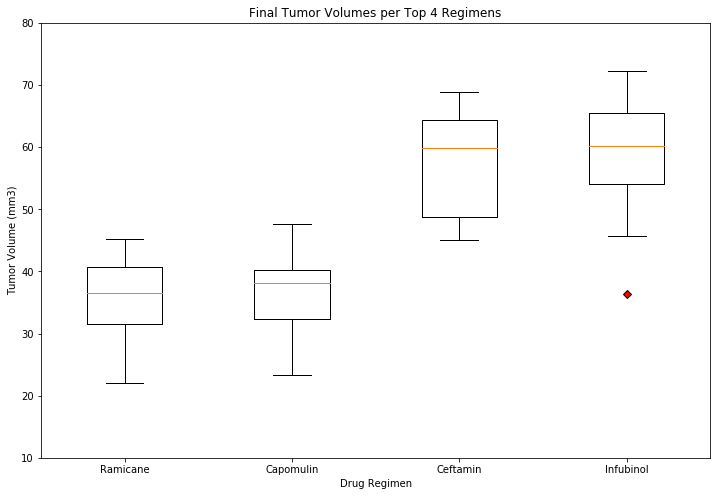

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Reset index to be able to groupby regimen
final_df = final_vol_df.reset_index()

# Group By Regimen, and apply all Tumor Volume values to list
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top4)

# List comprehension to append Tumor Volume lists to a single list
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.figure(figsize=(12,8))

# Plot lists of tumor volumes
plt.boxplot(tumor_vols, labels=top4, flierprops={'marker':'D', 'markerfacecolor':'r'})
plt.ylim(10, 80)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Final Tumor Volumes per Top 4 Regimens')
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume (mm3) Over Time\nMouse ID s185')

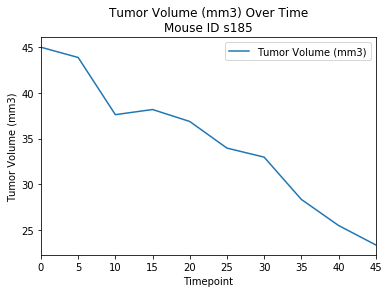

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create dataframe for Capomulin
capomulin_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and get one group
mouse_df = capomulin_df.groupby('Mouse ID').get_group('s185')

# Plot using dataframe.plot
ax = mouse_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Volume (mm3) Over Time\nMouse ID s185')

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume\nCapomulin Regimen')

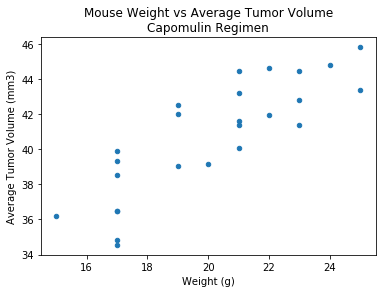

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Group By Mouse ID and calculate mean
grouped_capo = capomulin_df.groupby('Mouse ID').mean()

# Plot using dataframe.plot
ax = grouped_capo.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title('Mouse Weight vs Average Tumor Volume\nCapomulin Regimen')

Correlation coefficient: 0.84


Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume\nCapomulin Regimen')

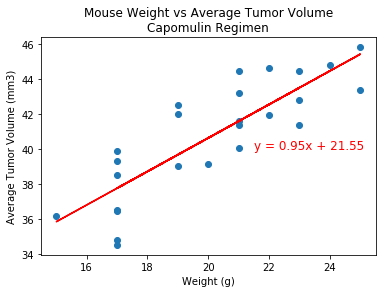

In [11]:
# Calculate the correlation coefficient and linear regression model for
# mouse weight and average tumor volume for the Capomulin regimen

# Get x, y values from mean dataframe
x_values = grouped_capo['Weight (g)']
y_values = grouped_capo['Tumor Volume (mm3)']

# Perform linear regression and report correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'Correlation coefficient: {round(rvalue,2)}')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Plot using matplotlib.pyplot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (21.5, 40), fontsize=12, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume\nCapomulin Regimen')